In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
num_classes = 10
num_features = 784
n_hidden_1 = 128

In [3]:
import numpy as np
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]).T, x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

In [5]:
m = x_train.shape[0]
m

784

In [10]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

In [30]:
def init_params():
    W1 = np.random.rand(n_hidden_1, 784) - 0.5
    b1 = np.random.rand(n_hidden_1, 1) - 0.5
    W2 = np.random.rand(num_classes, n_hidden_1) - 0.5
    b2 = np.random.rand(num_classes, 1) - 0.5
    return W1, b1, W2, b2
def ReLU(Z):
    return np.maximum(Z, 0)
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2 
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [31]:
losses = []
def get_predictions(A2):
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        predictions = get_predictions(A2)
        losses.append(cross_entropy(predictions, Y))
        if i % 10 == 9:
            print('Iteration: %d, accuracy: %.3f' %(i + 1, get_accuracy(predictions, Y)))
    return W1, b1, W2, b2

In [32]:
alpha = 0.01
n_epoch = 100
W1, b1, W2, b2 = gradient_descent(x_train, y_train, alpha, 100)

Iteration: 10, accuracy: 0.308
Iteration: 20, accuracy: 0.459
Iteration: 30, accuracy: 0.628
Iteration: 40, accuracy: 0.678
Iteration: 50, accuracy: 0.766
Iteration: 60, accuracy: 0.786
Iteration: 70, accuracy: 0.795
Iteration: 80, accuracy: 0.817
Iteration: 90, accuracy: 0.823
Iteration: 100, accuracy: 0.836


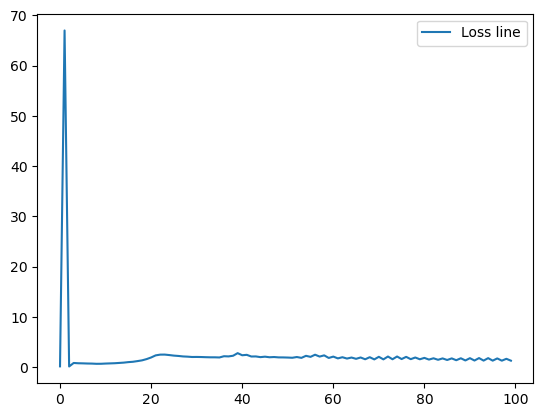

In [33]:
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()